# EDA of Target Value

## 目的
Target を回帰ではなく、分類として解くための下調べをする。

## 確かめたこと
- 離散値として扱うためのいくつかの処理方法

In [46]:
import pathlib
import numpy as np
import pandas as pd

from sklearn.metrics import make_scorer, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
src_dir = pathlib.Path("../data/raw")

In [18]:
train = pd.read_csv(src_dir / "train.csv")

In [19]:
train.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


## 適当なBinでを取ってみる。

In [65]:
num_bins = 20  # int(np.floor(1 + np.log2(len(train))))  # ref: https://www.kaggle.com/abhishek/step-1-create-folds
out, bins = pd.cut(train["target"], bins=num_bins, labels=False, retbins=True)

In [66]:
metric = mean_squared_error(train["target"], bins[out.values], squared=False)
metric

0.1540541630255861

<AxesSubplot:>

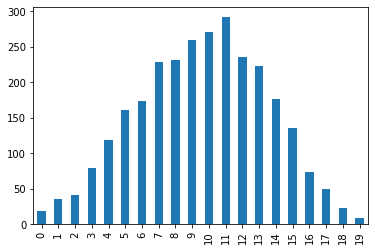

In [69]:
out.value_counts().sort_index().plot(kind='bar')

## 桁を丸めてみる

<AxesSubplot:>

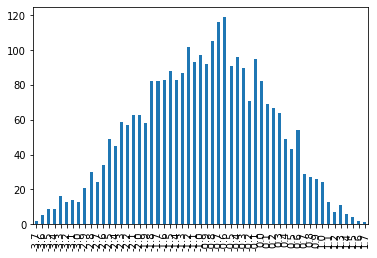

In [45]:
train["target"].round(1).value_counts().sort_index().plot(kind="bar")

In [49]:
metric = mean_squared_error(train["target"], train["target"].round(1), squared=False)
metric

0.02888187276573387